In [32]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<Figure size 7200x4800 with 0 Axes>

In [33]:
#import the dataset with pandas
df = pd.read_excel('C:/Users/maxil/Desktop/team-tidy/salary/salary_data_states.xlsx')

In [34]:
df

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",SOFTWARE ENGINEER,BLOOMINGTON,None,Nothing,n,...,"Software Developers, Applications",Illinois,IL,Unknown,y,H-1B,0.00,62171.00,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,Assistant Professor of Marketing,SAN FRANCISCO,Doctorate,marketing,n,...,"Business Teachers, Postsecondary",California,CA,94132.0,n,greencard,0.00,91440.00,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,SPECIAL EDUCATION TEACHER,LOS ANGELES,None,Nothing,n,...,"Special Education Teachers, Kindergarten and E...",California,CA,Unknown,y,H-1B,0.00,49470.00,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,SCIENCE TEACHER,HARLINGEN CISD,None,Nothing,n,...,"Biological Science Teachers, Postsecondary",Texas,TX,Unknown,y,H-1B,0.00,43800.00,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,SENIOR SOFTWARE ENGINEER,PORTLAND,None,Nothing,n,...,"Software Developers, Systems Software",Oregon,OR,Unknown,y,E-3 Australian,0.00,170000.00,software engineer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167273,I-200-12241-209885,certified-withdrawn,8/28/2012,6/6/2013,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",MIDDLE SCHOOL TEACHERS,SAIPAN,None,Nothing,n,...,"Middle School Teachers, Except Special and Car...",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,11648.00,teacher,167357
167274,I-200-11305-143547,denied,11/1/2011,11/3/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",PRESCHOOL TEACHER,SAIPAN,None,Nothing,n,...,"Preschool Teachers, Except Special Education",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,10920.00,teacher,167358
167275,I-200-11313-833007,certified,11/9/2011,11/16/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",TEACHER,SAIPAN,None,Nothing,n,...,"Teachers and Instructors, All Other*",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,10920.00,teacher,167359
167276,I-200-11312-798611,denied,11/8/2011,11/15/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",PRESCHOOL TEACHER,SAIPAN,None,Nothing,n,...,"Preschool Teachers, Except Special Education",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,10608.00,teacher,167360


In [6]:
#question 4
# 4. Does more required work experience increase the likelihood of a higher salary?

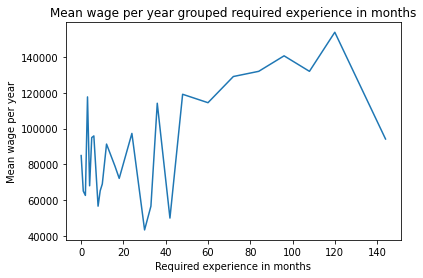

In [75]:
#4.1 What are the differences between the length of required work experience in relation to average salary?
df1 = pd.DataFrame(df.groupby(['EXPERIENCE_REQUIRED_NUM_MONTHS'])['PAID_WAGE_PER_YEAR'].mean()).reset_index()
plt.plot('EXPERIENCE_REQUIRED_NUM_MONTHS', 'PAID_WAGE_PER_YEAR', data=df1)
plt.title('Mean wage per year grouped required experience in months')
plt.xlabel('Required experience in months')
plt.ylabel('Mean wage per year')

plt.savefig('1_wage_experience.png', bbox_inches='tight', dpi=1200)

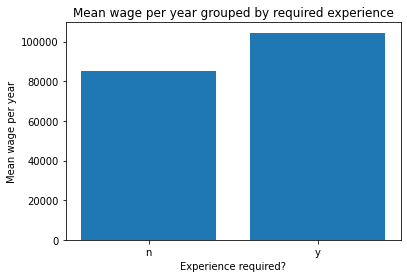

In [76]:
#4.2 Do you earn more at a company that requires work experience?
df2 = pd.DataFrame(df.groupby(['EXPERIENCE_REQUIRED_Y_N'])['PAID_WAGE_PER_YEAR'].mean()).reset_index()
plt.bar(x='EXPERIENCE_REQUIRED_Y_N', height='PAID_WAGE_PER_YEAR', data=df2)
plt.title('Mean wage per year grouped by required experience')
plt.xlabel('Experience required?')
plt.ylabel('Mean wage per year')

plt.savefig('2_wage_experience_required.png', bbox_inches='tight', dpi=1200)

3.94997653953328


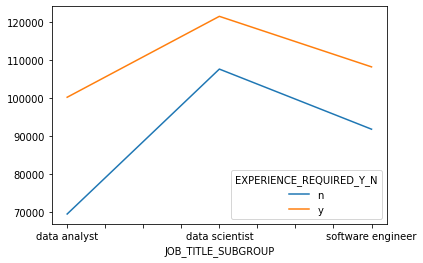

In [78]:
#4.3 What is the rate of companies in the tech industry that require work experience and what is the mean salary?

# create dataframe with only jobs from the tech industry
only_tech= df.drop(df[(df.JOB_TITLE_SUBGROUP == 'attorney') | (df.JOB_TITLE_SUBGROUP == 'management consultant') | (df.JOB_TITLE_SUBGROUP == 'assistant professor') | (df.JOB_TITLE_SUBGROUP == 'business analyst') | (df.JOB_TITLE_SUBGROUP == 'teacher')].index)
# rate of the companies in the tech industry that require work experience
only_tech.pivot_table(values="PAID_WAGE_PER_YEAR",index="JOB_TITLE_SUBGROUP",columns="EXPERIENCE_REQUIRED_Y_N").plot()
print(len(only_tech[only_tech['EXPERIENCE_REQUIRED_Y_N']=='y'])/len(only_tech['EXPERIENCE_REQUIRED_Y_N'])*100)

plt.savefig('3_wage_experience_tech.png', bbox_inches='tight', dpi=1200)

In [ ]:
#question 5
# 5. Does better required education increase the likelihood of a higher salary?

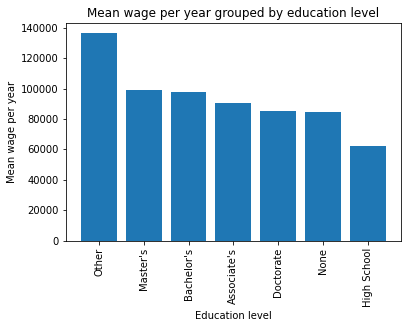

In [79]:
#5.1 What are the differences between different levels of education in terms of average salary?
df4 = pd.DataFrame(df.groupby(['EDUCATION_LEVEL_REQUIRED'])['PAID_WAGE_PER_YEAR'].mean()).reset_index()
df4 = df4.sort_values('PAID_WAGE_PER_YEAR',ascending=False)
plt.bar(x='EDUCATION_LEVEL_REQUIRED', height='PAID_WAGE_PER_YEAR', data=df4)
plt.xticks(rotation=90)
plt.title('Mean wage per year grouped by education level')
plt.xlabel('Education level')
plt.ylabel('Mean wage per year')

plt.savefig('4_wage_education.png', bbox_inches='tight', dpi=1200)

6.606367842752784


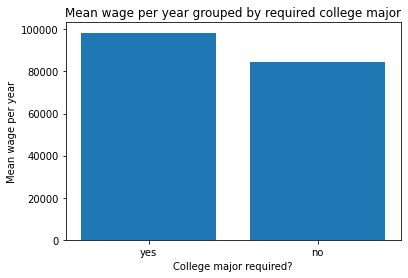

In [80]:
#5.2 Do you earn more at a company that requires a college degree?
print((len(df[df['COLLEGE_MAJOR_REQUIRED']!='Nothing'])/len(df['COLLEGE_MAJOR_REQUIRED'])*100))
required=df[df['COLLEGE_MAJOR_REQUIRED']!='Nothing']
not_required=df[df['COLLEGE_MAJOR_REQUIRED']=='Nothing']

data = {
  "COLLEGE_MAJOR_REQUIRED": ["yes", "no"],
  "PAID_WAGE_PER_YEAR": [round(required.PAID_WAGE_PER_YEAR.mean(),2), round(not_required.PAID_WAGE_PER_YEAR.mean(),2)]
}

df5 = pd.DataFrame(data)

plt.bar(x='COLLEGE_MAJOR_REQUIRED', height='PAID_WAGE_PER_YEAR', data=df5)
plt.title('Mean wage per year grouped by required college major')
plt.xlabel('College major required?')
plt.ylabel('Mean wage per year')

plt.savefig('5_wage_college.png', bbox_inches='tight', dpi=1200)

7.696948224186305


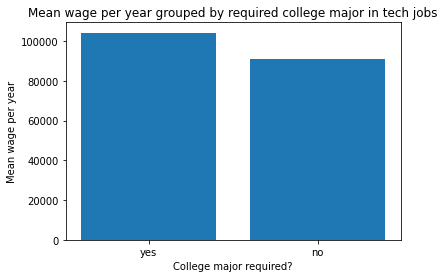

In [81]:
#5.3 What is the rate of companies in the tech industry that require a college major and what is the average wage?

print((len(only_tech[only_tech['COLLEGE_MAJOR_REQUIRED']!='Nothing'])/len(only_tech['COLLEGE_MAJOR_REQUIRED'])*100))
required=only_tech[only_tech['COLLEGE_MAJOR_REQUIRED']!='Nothing']
not_required=only_tech[only_tech['COLLEGE_MAJOR_REQUIRED']=='Nothing']

data2 = {
  "COLLEGE_MAJOR_REQUIRED": ["yes", "no"],
  "PAID_WAGE_PER_YEAR": [round(required.PAID_WAGE_PER_YEAR.mean(),2), round(not_required.PAID_WAGE_PER_YEAR.mean(),2)]
}

df6 = pd.DataFrame(data2)

plt.bar(x='COLLEGE_MAJOR_REQUIRED', height='PAID_WAGE_PER_YEAR', data=df6)
plt.title('Mean wage per year grouped by required college major in tech jobs')
plt.xlabel('College major required?')
plt.ylabel('Mean wage per year')

plt.savefig('6_wage_college_tech.png', bbox_inches='tight', dpi=1200)